## **Different Learning Rate Decay Methods**

### **1. Inverse Decay (Most Common)**

$$ \alpha = \frac{1}{1 + decay\_rate * epoch\_num} \cdot \alpha_0 $$

#### **How it works:**
- The learning rate decreases as epochs increase.
- The denominator $1 + decay\_rate * epoch\_num$ ensures a smooth reduction.
- Decay rate ($decay\_rate$) controls how fast the learning rate shrinks.

#### **Example:**
If $\alpha_0 = 0.1, decay\_rate = 0.01, and epoch = 100$, then:
$$ \alpha = \frac{1}{1 + 0.01 * 100} \cdot 0.1 = 0.05 $$
- The learning rate is slightly reduced from $0.1$ to $0.05$ over 100 epochs.

#### ✔ **Advantages:**
- Smoothly reduces learning rate
- Avoids drastic drops

#### ❌ **Disadvantages:**
- May decay too slowly if $decay\_rate$ is too low.
- If too high, learning may slow down too soon.

---

### **2. Exponential Decay**

$$ \alpha = k^{\text{epoch\_num}} \cdot \alpha_0 $$
- $k$ is a constant.

#### **How it works:**
- The learning rate decreases exponentially with each epoch.
- If $k \lt 1$, the learning rate decreases exponentially.

#### **Example:**
If $\alpha_0 = 0.1, k = 0.95, and epoch = 100$, then:
$$ \alpha = 0.95^{100} \cdot 0.1 \approx 0.006 $$
- The learning rate decreases rapidly to $0.006$ after 100 epochs.

#### ✔ **Advantages:**
- Faster decay for faster convergence.

#### ❌ **Disadvantages:**
- May decay too quickly if $k$ is too low, slowing down learning too soon.

---

### **3. Square Root Decay**

$$ \alpha = \frac{k}{\sqrt{\text{epoch\_num}}} \cdot \alpha_0 \quad or \quad \alpha = \frac{k}{\sqrt{t}} \cdot \alpha_0 $$

#### **How it works:**
- The learning rate decreases inversely proportional to the square root of the epoch number or time step $t$.
- The larger the epoch, the slower the decay.

#### **Example:**
If $k = 0.1$, $epoch = 100$, and $\alpha_0 = 0.1$, then:
$$ \alpha = \frac{0.1}{\sqrt{100}} \cdot 0.1 = 0.001 $$

#### ✔ **Advantages:**
- Slower decay than exponential.
- Avoids drastic drops, making it suitable where steady learning is needed.

#### ❌ **Disadvantages:**
- May decay too slowly if $k$ is too small.

---

### **Comparing the Methods**

| Decay Method | Formula | Charactersitics | Best for... |
|--------------|---------|-----------------|------------|
| Inverse Decay | $\alpha = \frac{1}{1 + decay\_rate * epoch\_num} \cdot \alpha_0$ | Smooth reduction, controlled by decay rate | Most common, general use cases, prevents drastic learning rate drops |
| Exponential Decay | $\alpha = k^{\text{epoch\_num}} \cdot \alpha_0$ | Fast decay, stops learning quickly | Fast convergence, quick learning, but risks stopping too soon |
| Square Root Decay | $ \alpha = \frac{k}{\sqrt{\text{epoch\_num}}} \cdot \alpha_0$ | Slower decay, avoids drastic drops | Steady learning, stable convergence |

---

In [7]:
import matplotlib.pyplot as plt

In [8]:
iterations = 50  # Number of iterations

In [9]:
# Inverse learning rate decay
alpha = 0.1
alpha_0 = 0.2  # Initial learning rate
decay = 1  # Decay rate

alpha_values_1 = [alpha]  # Store alpha values

for i in range(iterations):
    alpha = alpha_0 * (1. / (1. + decay * i))  # Decay learning rate
    alpha_values_1.append(alpha)  # Store alpha value

In [10]:
# Exponential learning rate decay - Method 2
init_alpha = 0.95
alpha_0 = 0.2  # Initial learning rate

alpha_values_2 = []  # Store alpha values

for i in range(iterations):
    alpha = init_alpha**i * alpha_0
    alpha_values_2.append(alpha)  # Store alpha value

In [11]:
# Square root learning rate decay - Method 3
k = 0.1
alpha_0 = 0.2  # Initial learning rate

alpha_values_3 = []  # Store alpha values

for i in range(1, iterations):
    alpha = (k / i**0.5) * alpha_0
    alpha_values_3.append(alpha)  # Store alpha value

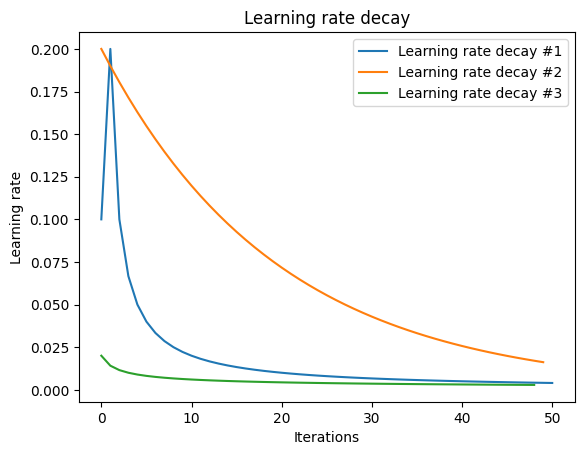

In [12]:
plt.plot(alpha_values_1, label='Learning rate decay #1')
plt.plot(alpha_values_2, label='Learning rate decay #2')
plt.plot(alpha_values_3, label='Learning rate decay #3')

plt.xlabel('Iterations')
plt.ylabel('Learning rate')
plt.title('Learning rate decay')
plt.legend()
plt.show()